# Introduction to Python programming for scientific applications


## Day 2
* Part 1: More basics
 * Where to find more information
 * A new data type: the *dictionary*
 * Reading from and writing to files
 * Interpret content in files via string manipulation

 
* Part 2: A glimpse into scipy
  * Solving ODEs using scipy and numpy
  * Simple image processing
  * Reading and processing data files with pandas

## A dictionary is a generalization of a list

 Recall the basic features of lists: 

   * store a *sequence* of elements in a single object (`[1,3,-1]`)

   * each element is a Python object

   * the elements are indexed by integers 0, 1, ...

The dictionary is a generalization of lists, where the indices can be numbers, text or other object. The dictionary in Python is hash, HashMap and associative array in other languages. Dictionaries are useful because the list index is sometimes unnatural for locating an element of a collection of objects. 

As an example, suppose we need to store the temperatures in Oslo, London and Paris. A solution based on lists may look like:

In [5]:
temps = [13, 15.4, 17.5]
cities = ['Oslo','London','Paris']
print(f'The temperature in {cities[0]} is {temps[0]} degrees')

The temperature in Oslo is 13 degrees


We can look up a temperature by mapping a city and associated temperature to the same index, but it would be more natural to write `temps[Oslo]` directly. This is precisely what a dictionary allows, by providing a direct mapping from strings to objects:

In [35]:
# Initialize dictionary
temps = {'Oslo': 13, 'London': 15.4, 'Paris': 17.5}

# Applications
print('The temperature in London is', temps['London'])
print('The temperature in Oslo is',   temps['Oslo'])

The temperature in London is 15.4
The temperature in Oslo is 13


Important:

 * The string index, like `Oslo`, is called *key*, while `temps['Oslo']`
   is the associated *value*

 * A dictionary is an *unordered* collection of key-value pairs
 
 * Any immutable Python object can be used as a dictionary key; for instance an integer, string, tuple (but not a list)

## Initializing and manipulating dictionaries

Two ways of initializing a collection of key-value pairs:

In [36]:
temps = {'Oslo': 13, 'London': 15.4, 'Paris': 17.5}
# or
temps = dict(Oslo=13, London=15.4, Paris=17.5)
print(temps)

{'Oslo': 13, 'London': 15.4, 'Paris': 17.5}


A dictionary has no `append()`-function. To add a new element, we simply introduce a new key and associated value:

In [37]:
temps['Madrid'] = 26.0
print(temps)

{'Oslo': 13, 'London': 15.4, 'Paris': 17.5, 'Madrid': 26.0}


Looping (iterating) over a dictionary means looping over the keys:

Example:

In [38]:
for city in temps:
  print(f'The {city} temperature is {temps[city]}')

The Oslo temperature is 13
The London temperature is 15.4
The Paris temperature is 17.5
The Madrid temperature is 26.0


Note: the sequence of keys is arbitrary! Use `sorted` if you need a
particular sequence:

In [7]:
for city in sorted(temps):   # alphabetic sort of keys
    value = temps[city]
    print(value)

15.4
26.0
13
17.5


### We can test for particular keys, delete elements, etc

Does the dict have a particular key?

In [39]:
if 'Berlin' in temps:
    print('Berlin:', temps['Berlin'])
else:
    print('No temperature data for Berlin')

No temperature data for Berlin


In [8]:
'Oslo' in temps     # standard boolean expression

True

Delete an element of a dict:

In [11]:
del temps['Oslo']   # remove Oslo key w/value
temps

{'London': 15.4, 'Madrid': 26.0, 'Paris': 17.5}

In [12]:
len(temps)          # no of key-value pairs in dict.

3

### Example: Polynomials represented by dictionaries

The information in the polynomial

$$
p(x)=-1 + x^2 + 3x^7
$$

can be represented by a dict with power as key (`int`) and
coefficient as value (`float`):

In [7]:
p = {0: -1, 2: 1, 7: 3.5}

We evaluate the polynomial by looping and summing over the elements in the dictionary. To evaluate a general polynomial $\sum_{i\in I} c_ix^i$ for some $x$, we have:

In [9]:
def eval_poly_dict(poly, x):
    value = 0.0
    for power in poly:
        value += poly[power]*x**power
    return value


Or a shorter pro version:

In [10]:
def eval_poly_dict2(poly, x):
    # Python's sum can add elements of an iterator
    return sum(poly[power]*x**power for power in poly)

### Quick exercise: adding polynomials

Write a function `poly_add(p1, p2)` which takes as input two dictionaries representing polynomials, and returns the dictionary representing the sum of the two polynomials. 

In [15]:
def poly_add(p1,p2):
    result = p1.copy()
    for power in p2:
        if power in result:
            result[power] += p2[power]
        else:
            result[power] = p2[power]
    return result


## Reading data from files

Python has multiple ways to read data from a regular textfile:

In [4]:
infile  = open('data/filename.txt', 'r') # open file for reading

line    = infile.readline()   # read the next line
filestr = infile.read()       # read rest of file into string
lines   = infile.readlines()  # read rest of file into list
for line in infile:           # read rest of file line by line
    pass
infile.close()                # close the file

All the variables read from the file above are Python `string` objects. Specifically, `line` is a string, `filestr` is a (potentially long) string, and `lines` is a list of
strings. To process the contents of a text file, we need tools to interpret and manipulate strings. The Python language has a large selection of such tools, which makes string and file processing very convenient. 

A string is simply a sequence of characters, which can be indexed, traversed in a for-loop etc., much like we have done with lists:

In [41]:
s1 = 'All work and no play makes Jack a dull boy.'
for c in s1:
    print(c,end=' ')
    
for i in range(len(s1)):
    print(s1[i],end=' ')

A l l   w o r k   a n d   n o   p l a y   m a k e s   J a c k   a   d u l l   b o y . A l l   w o r k   a n d   n o   p l a y   m a k e s   J a c k   a   d u l l   b o y . 

But unlike lists, strings are immutable objects, so an operation like `s1[0] = a` is not allowed. 

For reading and processing strings, Python has a number of useful tools:

In [42]:
#split string into words:
words = s1.split()
print(words)

#split with user-defined delimiter:
print(s1.split('k'))

#join a list of strings to one:
print('_'.join(words))

#find a particular substring:
print(s1.find('play'))

#is a substring contained in a string:
print('dull' in s1)

#extract a substring by slicing:
print(s1[:8])

['All', 'work', 'and', 'no', 'play', 'makes', 'Jack', 'a', 'dull', 'boy.']
['All wor', ' and no play ma', 'es Jac', ' a dull boy.']
All_work_and_no_play_makes_Jack_a_dull_boy.
16
True
All work


In [43]:
#strip away leading and trailing whitespace:
s = '   text with leading/trailing space   '
s.strip()
#convert a string to a number:
n = '2.3'
float(n)

2.3

## Example: Read file data into a dictionary

Suppose we have data in a text file with the following format:

We want to store the data in a dictionary, with the city names as the keys and temperatures as values.

**Program:**

In [45]:
infile = open('data/deg2.txt', 'r')
temps = {}                  # start with empty dict
infile.readline()           #skip the first line
for line in infile:
    city, temp = line.split()
    city = city[:-1]        # remove last char (:)
    temps[city]  = float(temp)
    
print(temps)

{'Oslo': 21.8, 'London': 18.1, 'Berlin': 19.0, 'Paris': 23.0, 'Rome': 26.0, 'Helsinki': 17.8}


### Exercise: Read tabular data into a nested dictionary

**Data file `stars.txt`:**

We want to read the data from this file and store in a nested dictionary. In the main (outer) dictionary the key shall be the name of the star, and the corresponding value shall be a dictionary with keys `distance`, `brightness`, and `luminosity`, and the corresponding values as values. 

In [ ]:
infile = open('data/stars.txt','r')

#your code here

## Part 2: A glimpse into scipy
### Solving ODEs in Python

Many physical phenomena can be described by systems of ordinary differential equations
$$ \frac{du}{dt} = f(t,u), u(0) = u0 $$

As an example, we return to the formula from yesterday, for the motion of a ball:
$$y(t) = v_0 t + \frac{1}{2}at^2$$

But this is really the solution of a system of ODEs:
$$ y'(t) = v \\ v'(t) = a $$
with initial conditions $y(0) = 0, v(0) = v_0$.

How can we solve such a system in Python?

The simplest ODE solver available is the forward Euler method. Assume we know the solution $u_n$ at time $t_n$,
the approximate solution at $t_{n+1}= t_n+\Delta t$ is given by:
$$
u_{n+1} = u_n + \Delta t f(t_n,u_n)
$$



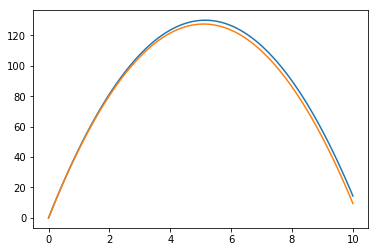

In [28]:
import numpy as np
import matplotlib.pyplot as plt

T = 10
n = 100
dt = T/n

v0 = 50
a = -9.81

t = np.linspace(0,T,n+1)
y = np.zeros_like(t)
v = np.zeros_like(t)

y[0] = 0
v[0] = v0

for i in range(1,n+1):
    y[i] = y[i-1]+dt*v[i-1]
    v[i] = v[i-1]+dt*a
    
plt.plot(t,y)
plt.plot(t,v0*t+0.5*a*t**2)
plt.show()



The forward Euler method is of course not the best ODE solver around, and we don't really need to implement our own solver since there are plenty of readymade solvers in various packages. The most widely used package may be the one from the `scipy` package, which also contains a lots of other useful tools for scientific computing:

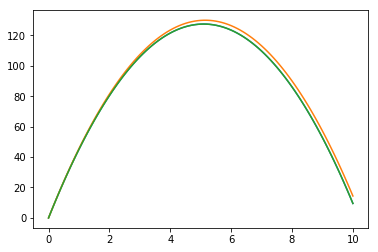

In [94]:
from scipy.integrate import odeint

def rhs(u,t):
    a = -9.81
    v = u[1]
    return [v,a]

y0 = np.array([0,v0])

u = odeint(rhs,y0,t)

plt.plot(t,u[:,0])
plt.plot(t,y)
plt.plot(t,v0*t+0.5*a*t**2)
plt.show()


A newer and more advanced ODE integrator is available in the function `odeint`, also found in the `scipy.integrate` toolbox. It offers a selection of solver methods which may be more efficient for stiff ODEs in particular. Unfortunately, there are some annoying differences in the user interface compared with `odeint`: 

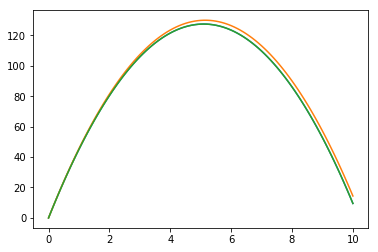

In [113]:
from scipy.integrate import solve_ivp

def rhs(t,u):
    a = -9.81
    v = u[1]
    return [v,a]

y0 = np.array([0,v0])

s = solve_ivp(rhs,[0,T],y0,t_eval=t)

plt.plot(s.t,s.y[0,:])
plt.plot(t,y)
plt.plot(t,v0*t+0.5*a*t**2)
plt.show()

### Scipy also has simple tools for image processing
An image is just an array of numerical values, which can be stored and manipulated as a numpy array. 

(768, 1024, 3)
[[364 415 462 ... 319 349 373]
 [271 334 395 ... 314 362 398]
 [223 286 349 ... 314 362 395]
 ...
 [269 285 323 ... 375 372 372]
 [258 288 335 ... 374 370 370]
 [260 294 334 ... 371 367 364]]
762


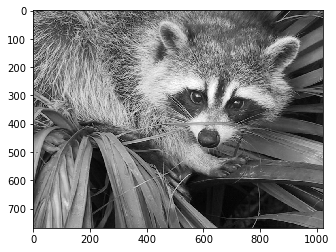

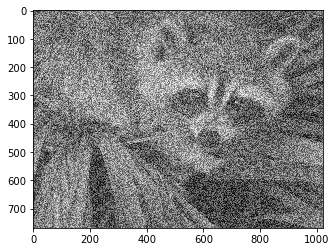

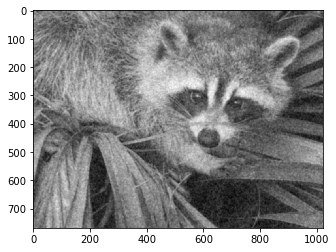

In [156]:
from scipy import misc
from scipy.ndimage import gaussian_filter, laplace,sobel
import imageio


f = misc.face()

print(f.shape)

#convert to grayscale by adding the color channels
fg = np.sum(f,axis=2)

print(fg)

amp = np.max(fg)
print(amp)

noise = np.random.randint(amp,size=f2.shape)
noisy = fg+noise
filtered = gaussian_filter(noisy,2.0)

import matplotlib.pyplot as plt

plt.figure(1)
plt.imshow(fg)
plt.figure(2)
plt.imshow(noisy)
plt.figure(3)
plt.imshow(filtered)
plt.show()

(16384,)
[240 164 255 ... 107  89  80]


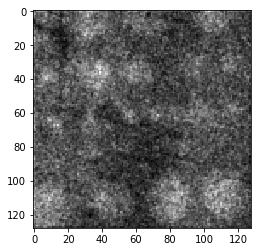

In [175]:
infile = open('./data/Cr2p-dots_images.vms')

data = []

while True:
    line = infile.readline()
    if line[:5] == '16384':
        break

#skip two lines
infile.readline()
infile.readline()

for i in range(16384):
    data.append(int(infile.readline().strip()))

data = np.array(data)
img_data = data.reshape((128,128))
print(data.shape)
print(data)

plt.imshow(img_data)
plt.show()

In [177]:
import imageio

imageio.imwrite('grayscale.jpg',img_data)